In [3]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array


# Define constants
IMG_SIZE = 224  # Standard size for many CNN architectures
DATA_DIR = "c:\\Users\\Denny\\Downloads\\fundustrain"  # Corrected dataset directory path

# Initialize lists to store training images and labels
train_images = []
train_labels = []

# Get list of all condition categories (subfolders)
categories = os.listdir(DATA_DIR)

# Create a dictionary to map categories to numeric labels
label_dict = {category: idx for idx, category in enumerate(categories)}

# Load and preprocess training images
for category in categories:
    path = os.path.join(DATA_DIR, category)
    if os.path.isdir(path):
        for img_name in os.listdir(path):
            try:
                img_path = os.path.join(path, img_name)
                # Load and resize image
                img = Image.open(img_path).convert('RGB')
                img = img.resize((IMG_SIZE, IMG_SIZE))
                # Convert to array and normalize
                img_array = img_to_array(img)
                img_array = img_array / 255.0
                
                # Add to training dataset
                train_images.append(img_array)
                train_labels.append(label_dict[category])
            except Exception as e:
                print(f"Error processing {img_path}: {str(e)}")

# Convert lists to numpy arrays
X_train = np.array(train_images)
y_train = np.array(train_labels)

print(f"Training samples: {len(X_train)}")
print(f"Number of classes: {len(categories)}")

# Import required libraries for the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
import tensorflow as tf

# Convert labels to categorical format
y_categorical = to_categorical(y_train)

# Split the data into training and validation sets
X_train, X_val, y_train_cat, y_val_cat = train_test_split(X_train, y_categorical, test_size=0.2, random_state=42)

Training samples: 757
Number of classes: 7


In [4]:
# Create the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC(), tf.keras.metrics.F1Score()])

# Train the model
history = model.fit(X_train, y_train_cat,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val_cat))


c:\Users\Denny\miniconda3\envs\bme3053c\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 564ms/step - auc: 0.5604 - categorical_accuracy: 0.1855 - f1_score: 0.1179 - loss: 2.9710 - precision: 0.2124 - recall: 0.0536 - val_auc: 0.7205 - val_categorical_accuracy: 0.2829 - val_f1_score: 0.0630 - val_loss: 1.7034 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 521ms/step - auc: 0.6422 - categorical_accuracy: 0.2225 - f1_score: 0.0922 - loss: 1.8083 - precision: 0.3163 - recall: 0.0040 - val_auc: 0.7154 - val_categorical_accuracy: 0.2829 - val_f1_score: 0.0630 - val_loss: 1.6680 - val_precision: 1.0000 - val_recall: 0.0263
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 516ms/step - auc: 0.6851 - categorical_accuracy: 0.2886 - f1_score: 0.1177 - loss: 1.7361 - precision: 0.6605 - recall: 0.0473 - val_auc: 0.7092 - val_categorical_accuracy: 0.3421 - val_f1_score: 0.1327 - val_loss: 1.7174 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 511ms/step - au

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted category: 7. Advanced PDR


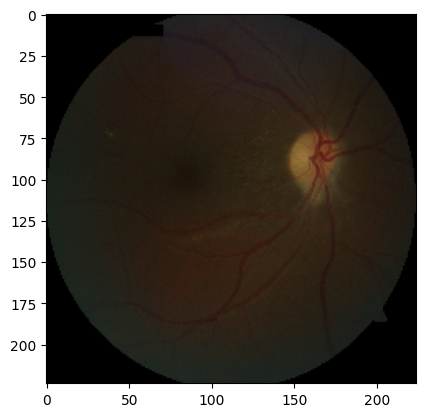

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def predict_image(path):
    # Load the image
    img = tf.keras.preprocessing.image.load_img(path, target_size=(IMG_SIZE, IMG_SIZE))
    
    # Preprocess the image
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Make predictions
    predictions = model.predict(img_array)
    
    # Get the predicted category
    predicted_category = np.argmax(predictions, axis=1)
    
    # Print the result
    print(f"Predicted category: {categories[predicted_category[0]]}")
    
    # Display the image
    plt.imshow(img)
    plt.show()

# Test the function
predict_image("c:\\Users\\Denny\\Downloads\\shouldbemod.jpg")

